# Power Analysis

> Power analysis is a tool to estimate the minimum sample size required in order to detect an effect in a test.

>> Sample is a part of a population that helps draw inferences about the entire population. Collecting complete information about the population is time-consuming and expensive and sometimes not even possible. Thus, we need an appropriate sample size to infer about the population based on that sample, in other words we require a sample representative of the population.

> An approach of calculating the sample size is based on **effect size (es)**.

>> We can estimate a sample size given the significance level (alpha) and power which is the probability of rejecting null hypothesis (accepting alternative hypothesis) or of detection of an effect.

>> The effect is quantified by a size called effect size. It has been observed that larger sample sizes have the capability to detect small effects.

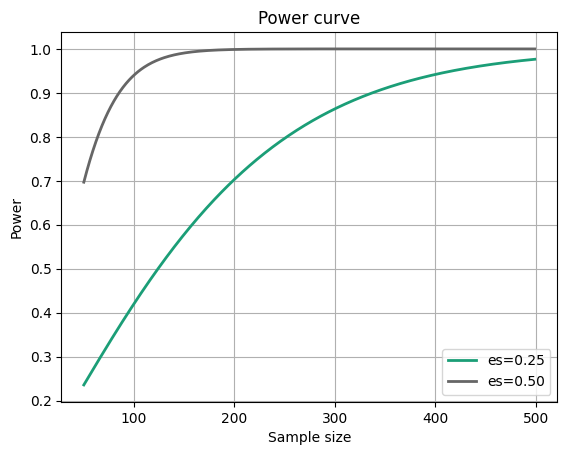

In [12]:
from matplotlib import pyplot

import statsmodels
from statsmodels.stats.power import TTestIndPower
from numpy import array

#Considering small and moderate effect sizes
effect_sizes = array([0.25, 0.5])
sample_sizes = array(range(50, 500))

PowerAns = TTestIndPower()
#PowerAns.solve_power(effect, power, ratio = 1.0, alpha)
PowerAns.plot_power(dep_var = 'nobs', nobs = sample_sizes, effect_size = effect_sizes)
pyplot.xlabel('Sample size')
pyplot.ylabel('Power')
pyplot.title('Power curve')
pyplot.grid()
pyplot.show()

> To figure out if a 'small' effect is statistically significant and actually makes us decide to change of mind on an action, we perform
a test having a hypothesis.

> We need enough evidence or sample size to perform a test, and the test statistic (metric) resulting out of it is the p-value.
If p-value is below a critical value (significance level), the null hypothesis is rejected and the default action is changed. This is the 'frequentist' approach which essentially tells us that there's a default action and with each evidence or datapoint we either will not change our mind (null) or we will (alternate).    

# Sensitivity Analysis (Classification)

>> **Sensitivity analysis** provides an approach to quantifying the relationship between model performance and sample data size
for a given problem & algorithm.

>> Datasets may be too small to effectively capture the capability of machine learning model at a larger scale or there may be a point where  data augmentation may not improve model performance.

>> A learning curve yields the sensitivity of performance to size of (train) data.

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

def load_dataset(n_samples):

  X, y = make_classification(n_samples = int(n_samples), n_features = 5, random_state = 1)
  return X, y

def evaluate_model(X, y):

  cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
  model = DecisionTreeClassifier()    #considering binary classification data & decision tree model
  scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
  return [scores.mean(), scores.std()]


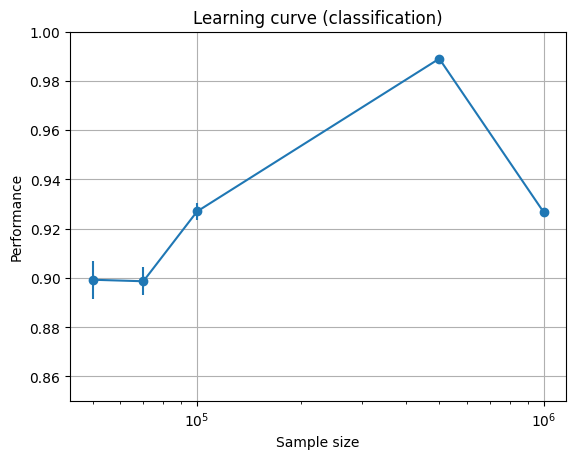

In [17]:
#consider a range of data-sizes depending on the runtime you're willing to spend

sizes = [50000, 70000, 100000, 500000, 1000000]
means, stds = list(), list()
for n_samples in sizes:
    X, y = load_dataset(n_samples)
    mean, std = evaluate_model(X, y)
    means.append(mean)
    stds.append(std)

#PLOT (logX scale)
err = [min(1, s*2) for s in stds]       #define error bar as 2 SDs from mean
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')

pyplot.ylim([0.85, 1.0])
pyplot.xlabel('Sample size')
pyplot.ylabel('Performance')
pyplot.title('Learning curve (classification)')
pyplot.grid()
pyplot.show()

# Sensitivity Analysis (Regression)

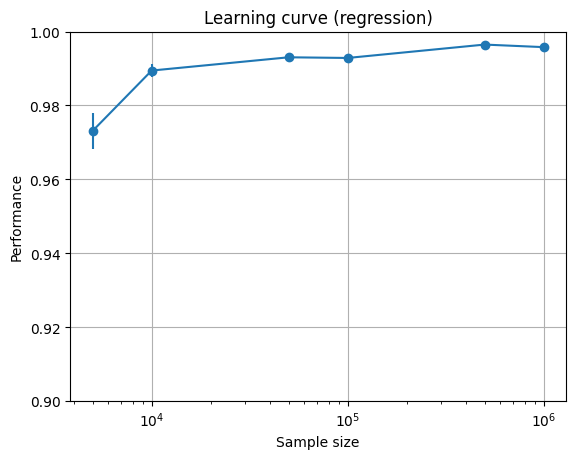

In [10]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

def load_dataset(n_samples):

  X, y, x1 = make_regression(n_samples = int(n_samples), n_features = 5, n_targets = 1, coef = True, random_state = 1)
  return X, y

def evaluate_model(X, y):

  model = XGBRegressor()     #considering boosted predictive model (XGB)
  scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2', n_jobs = -1)
  return [scores.mean(), scores.std()]

sizes = [5000, 10000, 50000, 100000, 500000, 1000000]
means, stds = list(), list()
for n_samples in sizes:

  X, y = load_dataset(n_samples)
  mean, std = evaluate_model(X, y)
  means.append(mean)
  stds.append(std)

#PLOT (logX scale)
err = [min(1, s*2) for s in stds]
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')
pyplot.ylim([0.90, 1.0])
pyplot.xlabel('Sample size')
pyplot.ylabel('Performance')
pyplot.title('Learning curve (regression)')
pyplot.grid()
pyplot.show()

>> The trends of increasing avg. (classification & regression) performance with sample datasize and decreasing model variance (measured using SD of accuracy) are evident.

>> The estimated mean performance (regression model) sees a saturation (if not a drop-off), suggesting that the model might measure statistical noise in the estimate hinting at an upper bound on model performance.


>>  The estimated mean performance (classification model) with increasing sample size sees a drop.


>> It is most likely that more data (beyond the upper bound/limit) will not improve the performance with the chosen configuration.